In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [5]:
#display(data)
def filter_data(data):
    
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]
    #data = data[data['flux_aper']<min_flux]
    #data = data[data['flux_aper_lolim']<min_flux]
    #data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    #display(data.describe())
    data_class = data[['class']]
    #data_id = data['src_id']
    #data_name = data['src_name']
    data_sig = data['significance']
    obs_info_params = [ 'livetime','significance','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params)
    flux_params = ['photflux_aper' ,'photflux_aper_lolim' , 'photflux_aper_hilim' , 'flux_aper' , 'flux_aper_lolim' , 'flux_aper_hilim' ]
    flux_params_band = []
    filters = ['_b' ,'_h' ,'_m' ,'_u' ,'_s']
    for fp in flux_params:
        for f in filters:
            temp = fp+f
            flux_params_band.append(temp)

    data_val = data_val.drop(columns=['index' , 'class'])
    #display(data_val)
    #import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    #data_val = data_val.replace(np.nan , 0)
    #msno.matrix(data_val)
    #plt.show()
    for d in data_val:
        
        
        max_val = np.amax(data_val[d])
        min_val = np.amin(data_val[d]) 
        data_val[d] = (data_val[d]-min_val)/(max_val-min_val)
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
#y = (x - min) / (max - min)
        #data_val[d] = (data_val[d]-mean)/np.sqrt(var)
        #data_val[d] = data_val[d] / np.amax(data_val[d])
        
        
    data_val = data_val.replace(np.nan , 0)
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_sig 

In [6]:
train_bh = pd.read_csv('processed_data/BH_')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
#display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_')
train_ns = train_ns.sample(frac=1)

train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_sig = filter_data(train)
display(data_val.describe())

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,flux_brems,flux_brems_lolim,flux_brems_hilim,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,0.405772,0.299390,0.412578,0.475729,0.497027,0.330700,0.073759,0.336558,0.396229,0.464286,...,0.023443,0.022373,0.023921,0.010732,0.014849,0.006533,0.011490,0.012215,0.010280,0.012353
std,0.221633,0.242112,0.202805,0.201697,0.194583,0.293861,0.183519,0.276541,0.268479,0.237701,...,0.108967,0.105301,0.110320,0.085034,0.077365,0.052629,0.075177,0.080658,0.068562,0.059748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270218,0.000000,0.286216,0.324350,0.358846,0.000000,0.000000,0.000000,0.175331,0.349231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.381014,0.295346,0.402127,0.502370,0.504328,0.363721,0.000000,0.360282,0.437503,0.486905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.555333,0.531809,0.533815,0.615238,0.626640,0.549342,0.000000,0.552846,0.599765,0.619847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
def split_data(x,y,s,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    #id_train = id[:split_no]
    #id_test = id[split_no:]
    return (x_train , y_train , s_train ,) , (x_test , y_test , s_test , )

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s
#s = [float(si) for si in s]
(x_train , y_train , s_train , ) , (x_test , y_test , s_test , ) =  split_data(x, y,s , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(460, 92) (460, 1)
(0, 92) (0, 1)


In [8]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [9]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = float(desc_class.value_counts()['NS'])
bh_n= float(desc_class.value_counts()['BH'])
print(ns_n , bh_n)

302.0 158.0


In [14]:
def gen_model():
    #from tensorflow.keras.layers import Flatten
    #from tensorflow.keras.layers.convolutional import Conv2D
    #from tensorflow.keras.layers.pooling import MaxPooling2D
    visible = layers.Input(shape=(92,1))
    x = layers.BatchNormalization(axis=-1)(visible)
    #x = tf.keras.layers.LeakyReLU(alpha=0.3)(visible)
    x = layers.Conv1D(32, kernel_size=3, activation='relu' , kernel_regularizer= 'l2', kernel_initializer='he_normal')(x)
    x = layers.MaxPool1D(pool_size=(2))(x)

    #x = layers.Conv1D(32, kernel_size=4, activation='relu' ,   kernel_regularizer= 'l2', kernel_initializer='he_normal')(x)
    #x = layers.MaxPool1D(pool_size=(2))(x)
    x = layers.Conv1D(16, kernel_size=3, activation='relu' , kernel_regularizer= 'l2', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling1D(pool_size=(2))(x)
    #x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=(2))(x)
    x = layers.Flatten()(x)
    #x = layers.BatchNormalization(axis=-1)(x)
    x = layers.Dense(16, activation='relu' ,  kernel_regularizer= 'l2',kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(16, activation='relu')(x)
    output = layers.Dense(2, activation='softmax' , kernel_regularizer= 'l2' , kernel_initializer='he_normal')(x)
    model_cnn = keras.Model(inputs=visible, outputs=output)
    # summarize layers
    #print(model_cnn.summary())
    model_cnn.compile(
            loss = "categorical_crossentropy",
            optimizer = keras.optimizers.Adam(learning_rate=0.0005),
            metrics = ["accuracy"], 
        )
    
    return model_cnn
def fit_model(model , x_train , one_hot_y_train , verbose=0):
    class_weight = {0: (ns_n/bh_n),
                    1: 1}
    history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=120, validation_split=0.2 , class_weight=class_weight, verbose=verbose)
    return history


In [15]:
model = gen_model()
history = fit_model(model , x_train , one_hot_y_train , verbose=1)

Epoch 1/120
6/6 [==============================] - 6s 440ms/step - loss: 3.0696 - accuracy: 0.6587 - val_loss: 1.8864 - val_accuracy: 0.6848
Epoch 2/120
6/6 [==============================] - 0s 81ms/step - loss: 2.3802 - accuracy: 0.6574 - val_loss: 1.9459 - val_accuracy: 0.5761
Epoch 3/120
6/6 [==============================] - 1s 108ms/step - loss: 2.1684 - accuracy: 0.5371 - val_loss: 1.9834 - val_accuracy: 0.3370
Epoch 4/120
6/6 [==============================] - 0s 86ms/step - loss: 2.1969 - accuracy: 0.4462 - val_loss: 1.9722 - val_accuracy: 0.3261
Epoch 5/120
6/6 [==============================] - 0s 72ms/step - loss: 2.1622 - accuracy: 0.4132 - val_loss: 1.9329 - val_accuracy: 0.3913
Epoch 6/120
6/6 [==============================] - 0s 84ms/step - loss: 2.1214 - accuracy: 0.5588 - val_loss: 1.8992 - val_accuracy: 0.6087
Epoch 7/120
6/6 [==============================] - 1s 93ms/step - loss: 2.0936 - accuracy: 0.5958 - val_loss: 1.8741 - val_accuracy: 0.6522
Epoch 8/120
6/6 [=

In [12]:
def res_score(model , x , y ):
    y_prob = model.predict(x)
    y_pred = np.zeros_like(y_prob)
    y_pred[np.arange(len(y_prob)), y_prob.argmax(1)] = 1
    cf = np.matrix(np.matmul(y.T , y_pred))
    total = cf.sum()
    row_sum = cf.sum(axis=0)
    acc = np.trace(cf) / total 
    col_sum = cf.sum(axis=1) 
    #print(cf)
    return cf , acc


_ , score = res_score(model , x_train , one_hot_y_train)
print(score)

0.9478261


/home/kumaran/miniconda3/envs/ciao-4.13/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
1it [00:42, 42.40s/it]

-----------------------------------
training_acc : 0.78855723
test_acc : 0.7586207


2it [01:28, 44.73s/it]

-----------------------------------
training_acc : 0.8358209
test_acc : 0.7241379


3it [02:11, 43.98s/it]

-----------------------------------
training_acc : 0.9029851
test_acc : 0.79310346


4it [03:02, 46.67s/it]

-----------------------------------
training_acc : 0.8233831
test_acc : 0.7758621


5it [03:55, 48.91s/it]

-----------------------------------
training_acc : 0.81389576
test_acc : 0.75438595


6it [04:45, 49.32s/it]

-----------------------------------
training_acc : 0.8014888
test_acc : 0.7368421


7it [05:30, 47.79s/it]

-----------------------------------
training_acc : 0.83870965
test_acc : 0.9122807


8it [06:10, 46.35s/it]

-----------------------------------
training_acc : 0.8833747
test_acc : 0.7017544


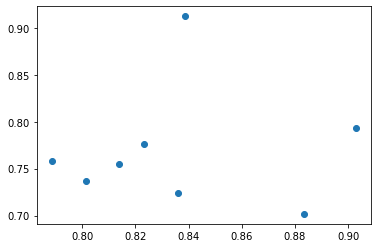

In [18]:
from tqdm import tqdm
def eval_model(x , y , k=10):
    from sklearn.model_selection import KFold
    kfold = KFold(8, True, 1)
    #k-fold cross-validation
    train_acc = []
    test_acc = []
    s =  int(len(x)/k)
    x = np.array(x)
    y = np.array(y)
    for train , test in tqdm(kfold.split(x)):
        xtr , ytr = x[train] , y[train]
        xtst , ytst = x[test] , y[test]
        model = gen_model()
        fit_model(model , xtr , ytr)
        _,train_acc_temp = res_score(model , xtr , ytr)
        _,test_acc_temp = res_score(model , xtst , ytst)
        train_acc.append(train_acc_temp)
        test_acc.append(test_acc_temp)
        print('-----------------------------------')
        print('training_acc :' , train_acc_temp)
        print('test_acc :' , test_acc_temp)
    return train_acc, test_acc
train_acc , test_acc = eval_model(x_train , one_hot_y_train)
plt.scatter(train_acc , test_acc)


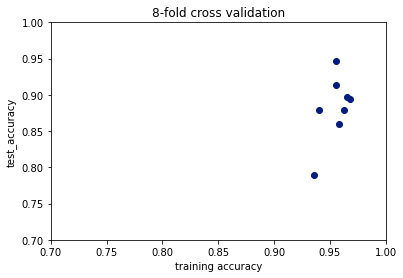

In [152]:
plt.scatter(train_acc , test_acc )
plt.xlim(0.7,1.0)
plt.ylim(0.7,1.0)
plt.style.use('seaborn-dark-palette')
plt.xlabel('training accuracy')
plt.ylabel('test_accuracy')
plt.title('8-fold cross validation')
plt.savefig('/content/drive/MyDrive/thesis_data/run_05.jpg')
plt.show()
plt.close()

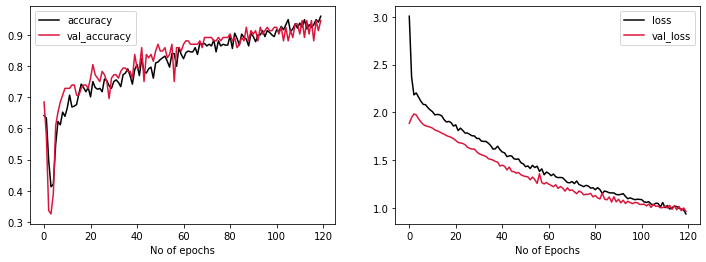

In [16]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()